In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# B(E3) Strengths

In [11]:
from pypdf import PdfReader 

FILES = !ls *.pdf

for file in FILES:
    
    reader = PdfReader(file)
    
    for i in range(len(reader.pages)):
        
        page = reader.pages[i] 
        text = page.extract_text() 

        if "B(E3)" in text:
            #print("================================================================================")
            #print("================================================================================")
            #print(text) 
            
            print(file)
            break



12C6.pdf
14C6.pdf
168Er68.pdf
16O8.pdf
20Ne10.pdf
24Mg12.pdf
28Si14.pdf
32S16.pdf
34S16.pdf
36Ar18.pdf
36S16.pdf
38Ar18.pdf
40Ar18.pdf
40Ca20.pdf
42Ca20.pdf
44Ca20.pdf
48Ca20.pdf


In [ ]:
for i in range(61):
    page = reader.pages[i] 
    text = page.extract_text() 
    if "B(E3)" in text:
        print("================================================================================")
        print("================================================================================")
        print(text) 

# Values of definite $E_{3_1^-}$ 

In [2]:
first3 = pd.read_csv("First_3_minus_EvenEven.csv")
first3["a"] = first3["n"] + first3["z"]

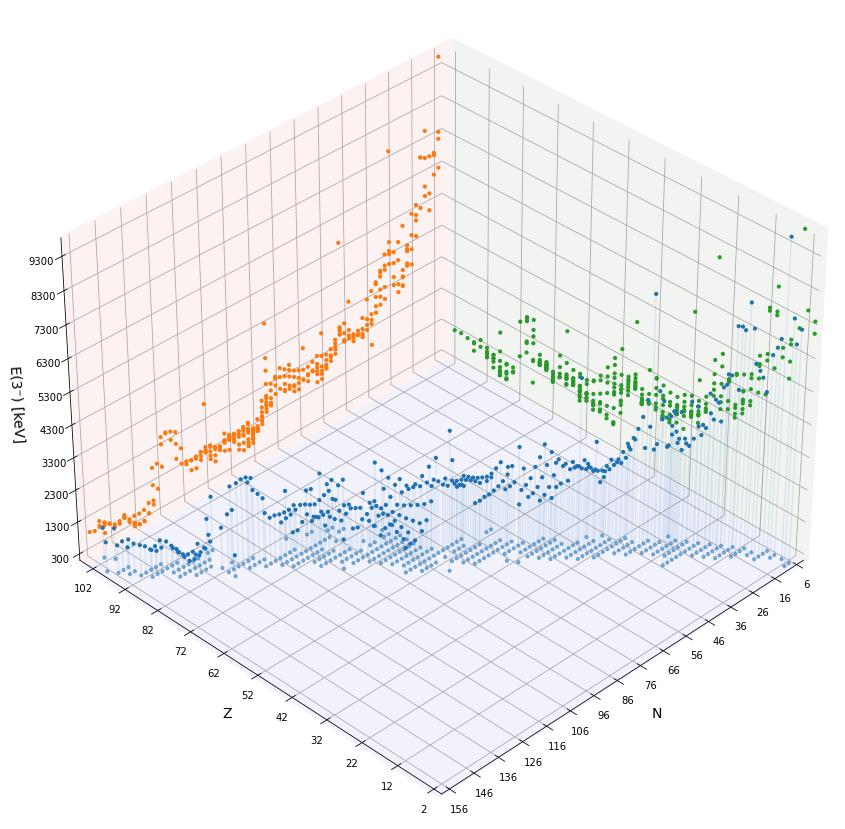

In [18]:

#%matplotlib notebook

# Data
N = first3["n"].to_numpy()
Z = first3["z"].to_numpy()
E = first3["firstThreeMinusEnergy(keV)"].to_numpy()
magic = [2, 8, 20, 28, 50, 82, 126]

# Canvas
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection ="3d")
 
#Plots
ax.scatter(N, Z, E, "o", s= 10, c = "C0", alpha=1)
ax.scatter(N, Z, 0, "+", s= 10, c = "C0", alpha=0.5)
ax.scatter(N, 105, E, "o", s= 10, c = "C1", alpha=1)
ax.scatter(0, Z, E, "o", s= 10, c = "C2", alpha=1)
for i in range(len(N)):
    ax.plot([N[i], N[i]], [Z[i], Z[i]], [E[i], 0], color='C0', alpha=0.1)  
#for i in range(len(magic)):
    #ax.plot([magic[i], magic[i]], [105, 105], [0, max(E)], color='C1', alpha=0.4)  
    #if i < len(magic)-1:
    #    ax.plot([0,0], [magic[i], magic[i]], [0, max(E)], color='C2', alpha=0.4)  

    
# Format the axis
ax.invert_xaxis()
ax.set_xlabel('N', fontsize=14, labelpad=10)
ax.set_ylabel('Z', fontsize=14, labelpad=10)
ax.set_zlabel('E(3⁻) [keV]', fontsize=14, labelpad=10, rotation=180)
ax.view_init(35, -135) 
ax.set_xticks(np.arange(min(N), max(N)+10, 10))
ax.set_yticks(np.arange(min(Z), max(Z)+10, 10))
ax.set_zticks(np.arange(300, 9600, 1000))

# Plot the planes
X, Y = np.meshgrid(np.linspace(0, 160, 10), np.linspace(0, 105, 10))
Z_xy = np.zeros_like(X)
X_xz, Z_xz = np.meshgrid(np.linspace(0, 160, 10), np.linspace(0,10000, 10))
Y_xz = np.full((len(X_xz[0]), len(X_xz[0])), 105)
Y_yz, Z_yz = np.meshgrid(np.linspace(0, 105, 10), np.linspace(0,10000, 10))
X_yz = np.zeros_like(Y_yz)
ax.plot_surface(X, Y, Z_xy, color='blue', alpha=0.05, rstride=100, cstride=100)
ax.plot_surface(X_xz, Y_xz, Z_xz, color='red', alpha=0.05, rstride=100, cstride=100)
ax.plot_surface(X_yz, Y_yz, Z_yz, color='green', alpha=0.05, rstride=100, cstride=100)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Maximum values
ax.set_xlim(max(N), min(N))
ax.set_ylim(min(Z), max(Z))
ax.set_zlim(min(E), max(E))

plt.show()

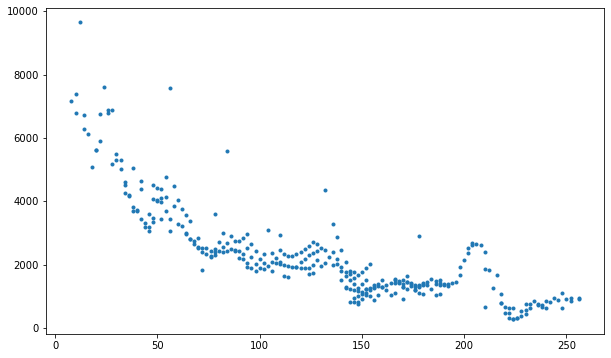

In [15]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["a"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()

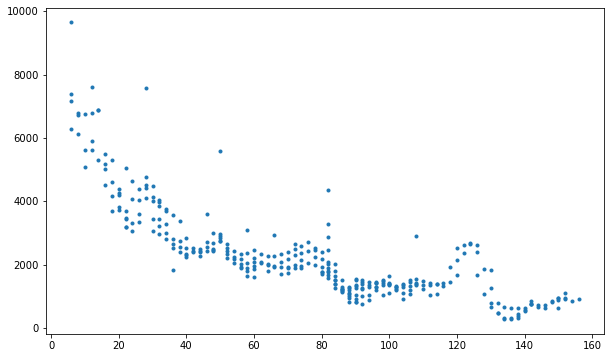

In [16]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["n"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()

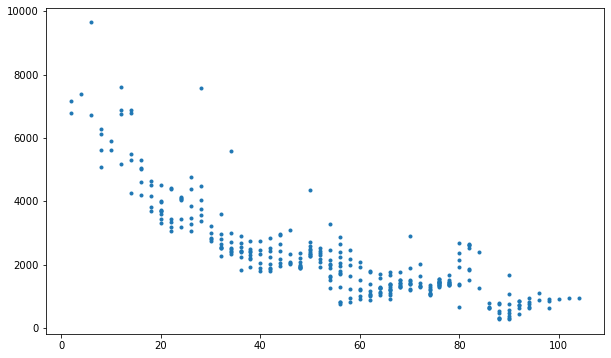

In [17]:
fig = plt.figure(figsize=(10,6))
plt.plot(first3["z"], first3["firstThreeMinusEnergy(keV)"], ".")
plt.show()